In [28]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'airline-passengers.csv',
 'airline.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [29]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [30]:
data=pd.read_csv('airline-passengers.csv',usecols=[1])
data.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [31]:
# timegap=[(data["Month"][i]-data["Month"][0]).days for i in range(1,data.shape[0])]

In [32]:
timegap.insert(0,0)

NameError: name 'timegap' is not defined

In [33]:
# new_data={"timegap":timegap,
#          "Passengers":data["Passengers"],
#         }
# new_data=pd.DataFrame(new_data)

In [34]:
data.shape

(144, 1)

In [35]:
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data.values)

In [36]:
X=[]
Y=[]
for i in range(data.shape[0]-1):
    X.append(data[i:i+1])
    Y.append(data[i+1])


In [37]:
# scaler=MinMaxScaler(feature_range=(0,1))
# X=scaler.fit_transform([X])
# Y=scaler.fit_transform([Y])

In [38]:
X=np.array(X)
Y=np.array(Y)

X.shape,Y.shape

((143, 1, 1), (143, 1))

In [39]:
X=np.reshape(X,(143,1,1))
Y=np.reshape(Y,(143,1))

In [71]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [72]:
x_test.shape

(43, 1, 1)

In [73]:
# plt.plot(timegap,data)

In [88]:
model=Sequential()
model.add(LSTM((4),batch_input_shape=(None,None,1)))
model.add(Dense(1))



In [89]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [90]:
model.summary(
)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [91]:
history=model.fit(x_train,y_train,epochs=100)

Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1660 - accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 83us/step - loss: 0.1603 - accuracy: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 0s 83us/step - loss: 0.1546 - accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 0s 80us/step - loss: 0.1491 - accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 0s 69us/step - loss: 0.1438 - accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 79us/step - loss: 0.1386 - accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 70us/step - loss: 0.1334 - accuracy: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 80us/step - loss: 0.1287 - accuracy: 0.0000e+00
Epoch 9/100
100/100 [==============================] - 0s 69us/step - loss: 0.1241 - accuracy: 0.0000e+00
Epoch 10/100
100/100 [=========================

100/100 [==============================] - 0s 92us/step - loss: 0.0253 - accuracy: 0.0100
Epoch 78/100
100/100 [==============================] - 0s 80us/step - loss: 0.0251 - accuracy: 0.0100
Epoch 79/100
100/100 [==============================] - 0s 80us/step - loss: 0.0250 - accuracy: 0.0100
Epoch 80/100
100/100 [==============================] - 0s 80us/step - loss: 0.0248 - accuracy: 0.0100
Epoch 81/100
100/100 [==============================] - 0s 80us/step - loss: 0.0246 - accuracy: 0.0100
Epoch 82/100
100/100 [==============================] - 0s 70us/step - loss: 0.0244 - accuracy: 0.0100
Epoch 83/100
100/100 [==============================] - 0s 80us/step - loss: 0.0243 - accuracy: 0.0100
Epoch 84/100
100/100 [==============================] - 0s 70us/step - loss: 0.0241 - accuracy: 0.0100
Epoch 85/100
100/100 [==============================] - 0s 80us/step - loss: 0.0239 - accuracy: 0.0100
Epoch 86/100
100/100 [==============================] - 0s 79us/step - loss: 0.0237 - 

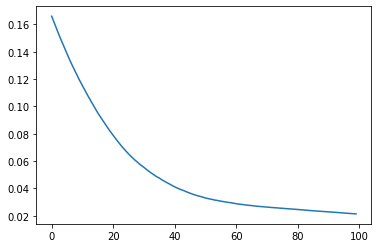

In [92]:
#plot for data with 1 LSTM
plt.plot(history.history['loss'])

In [62]:
result=model.predict(x_test)

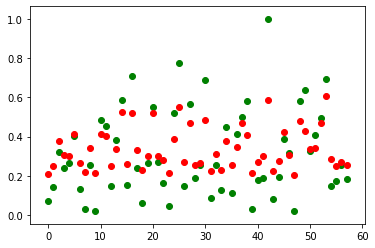

In [63]:
plt.scatter(range(58),y_test,c='green')
plt.scatter(range(58),result,c='red')